In [9]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Any,Dict
from langchain_core.messages import BaseMessage,HumanMessage,SystemMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [10]:
import os
from dotenv import load_dotenv
import operator
load_dotenv()
groq_api_key  = os.getenv("GROQ_API_KEY")
if not groq_api_key:
    raise ValueError("GROQ_API_KEY not found in environment")
llm = ChatOpenAI(
    model="openai/gpt-oss-120b",
    temperature=0,
    max_tokens=8192,
    api_key=groq_api_key,
    base_url = "https://api.groq.com/openai/v1"
)

In [11]:
from langgraph.graph.message import add_messages
#add_message is like a append function
class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]#base message mean , it can have any message human system tool assistant they all inherit this basemessage

In [12]:
def chat_node(state: ChatState) -> Dict[str,list]:

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [13]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)
graph.add_node("chat_node",chat_node)

graph.add_edge(START,"chat_node")
graph.add_edge("chat_node",END)

workflow = graph.compile(checkpointer=checkpointer)

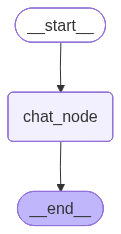

In [14]:
workflow

In [7]:
initial_state = {
    'messages': [HumanMessage(content="what is the capital of Pakistan")]
}
workflow.invoke(initial_state)["messages"][1].content

'The capital of Pakistan is **Islamabad**.'

In [19]:
thread_id = '1'
while True:
    user_message = input("Type Here")
    print(user_message)
    if user_message.strip().lower() in ["exit","quit",'bye']:
        break
    
    config = {'configurable':{'thread_id':thread_id}}
    response = workflow.invoke({"messages":[HumanMessage(content = user_message)]},config=config)
    print('AI:',response["messages"][-1].content)

what we add till yet
AI: So far the only additions we’ve done in this conversation are:

| Step | Numbers added | Result |
|------|---------------|--------|
| 1 | **10 + 14** | **24** |
| 2 | **24 + 4** (the extra 4 you asked to add) | **28** |

**What we’ve added up to now:**  
- First we added **10** and **14**.  
- Then we added **4** to the result of that first addition.

The current total after all the additions is **28**. If you’d like to add more numbers or do something else, just let me know!
bye


In [18]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='10+14', additional_kwargs={}, response_metadata={}, id='5cc22aeb-26fe-4237-8296-2bb2ff8b2cb2'), AIMessage(content='24', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 74, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 27, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': None, 'queue_time': 0.045423295, 'prompt_time': 0.002868758, 'completion_time': 0.079653053, 'total_time': 0.082521811}, 'model_provider': 'openai', 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_f640395b96', 'id': 'chatcmpl-b5e973ac-c4b2-4001-9c20-ab04cfe5ec8a', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b56ba-4b78-7330-8000-d8a22d9fccf3-0', usage_metadata={'input_tokens': 74, 'output_tokens': 37, 'total_tokens': 111, 'input_token_details': {},